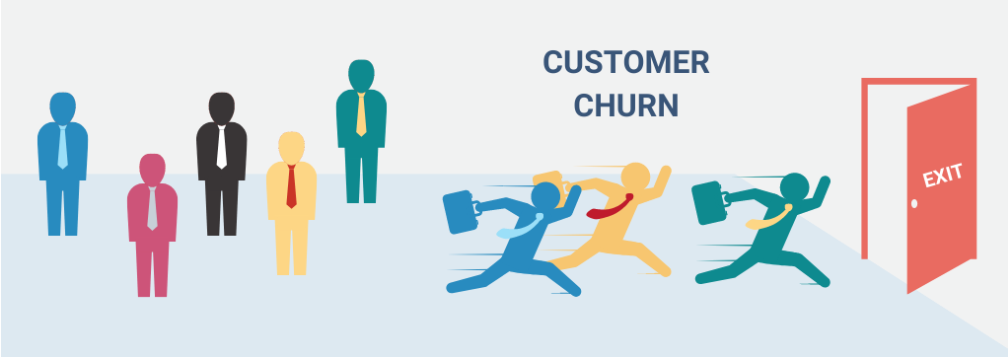



# Importing necessary libraries 

In [399]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import  confusion_matrix ,classification_report
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')


# Reading Dataset

In [254]:
df_train=pd.read_csv('D:\\datasets\\Uneeq intern\\Customer Churn\\customer_churn_dataset-training-master.csv')
df_test=pd.read_csv('D:\\datasets\\Uneeq intern\\Customer Churn\\customer_churn_dataset-testing-master.csv')
df=pd.concat([df_train,df_test],axis=0)
df.reset_index(inplace=True, drop=True)

In [255]:
# showing the first 5 Rows 
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [256]:
#check dimensions of Training Dataframe
df.shape

(505207, 12)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [258]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0
505206,64374.0,52.0,Female,45.0,15.0,9.0,25.0,Standard,Monthly,696.0,22.0,1.0


# Undertanding the data

In [259]:
#To learn the form of  data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [260]:
#finding missing values
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

<Axes: >

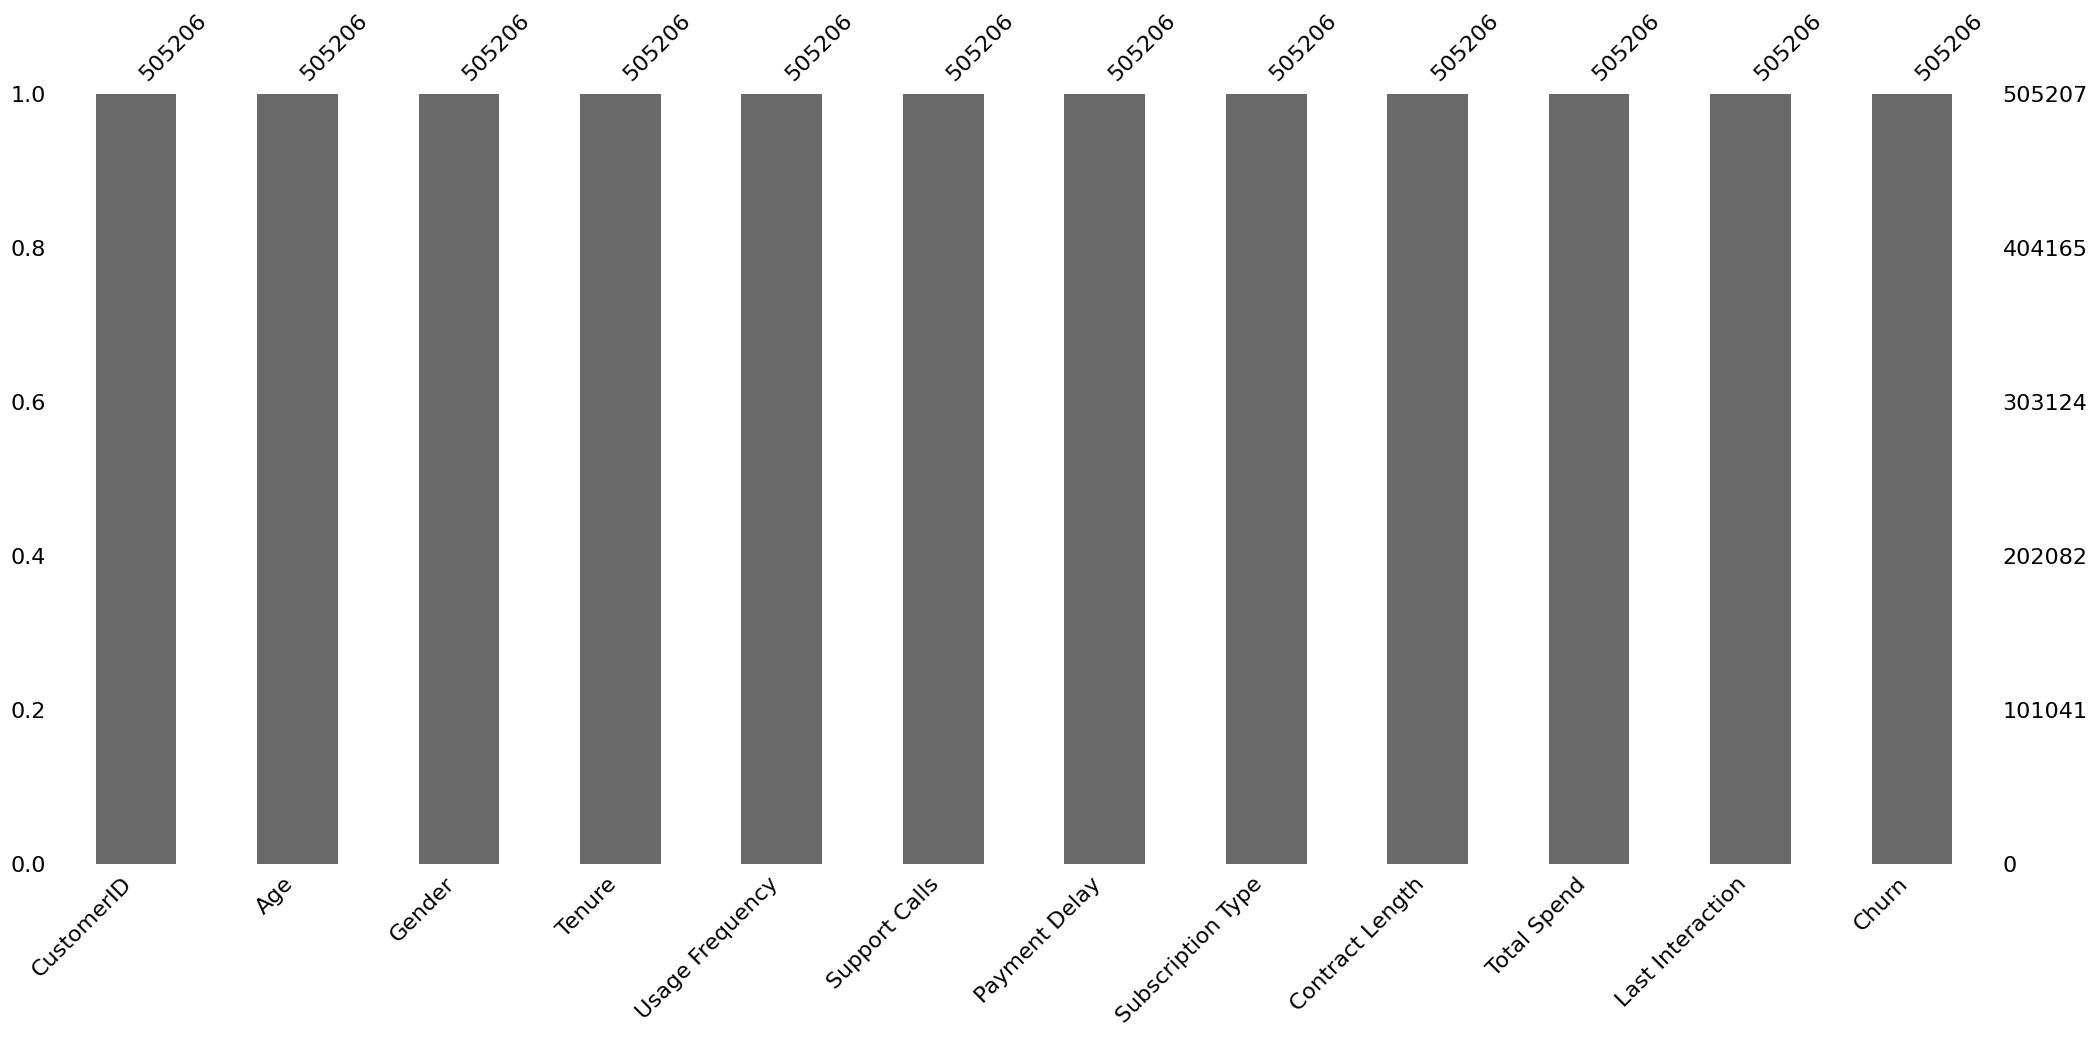

In [261]:
msno.bar(df) # show null values in graph 

In [262]:
df.dropna(inplace=True)

In [263]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [264]:
#finding duplicates 
df.duplicated().sum()

0

**check if the data balanced or not** 


In [265]:
df["Churn"].value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

Text(0.5, 1.0, 'churn distribution')

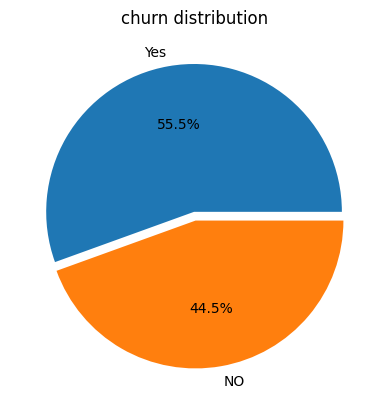

In [266]:

plt.pie(df['Churn'].value_counts(),labels=['Yes','NO'],autopct='%1.1F%%',explode=[0.03,0.03])
plt.title('churn distribution')

# Exploratory Data Analysis (EDA)

**initial preprocessing**

In [267]:
# dropping customer id  
df.drop('CustomerID',axis=1,inplace=True)

In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,505206.0,39.704172,12.670577,18.0,29.0,40.0,49.0,65.0
Tenure,505206.0,31.350435,17.237482,1.0,16.0,32.0,46.0,60.0
Usage Frequency,505206.0,15.714825,8.619323,1.0,8.0,16.0,23.0,30.0
Support Calls,505206.0,3.833317,3.133603,0.0,1.0,3.0,6.0,10.0
Payment Delay,505206.0,13.496843,8.451187,0.0,6.0,13.0,20.0,30.0
Total Spend,505206.0,620.072766,245.319256,100.0,446.0,648.9,824.0,1000.0
Last Interaction,505206.0,14.610581,8.608286,1.0,7.0,14.0,22.0,30.0
Churn,505206.0,0.555203,0.496944,0.0,0.0,1.0,1.0,1.0


In [269]:
df.describe(include="object").T

,count,unique,top,freq
Gender,505206,2,Male,280273
Subscription Type,505206,3,Standard,170630
Contract Length,505206,3,Annual,198608


In [270]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns] # renaming the column names

In [271]:
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [272]:
#Transform float data to integer values 
df[['age','tenure','usage_frequency','support_calls','payment_delay','total_spend','last_interaction','churn']]=\
df[['age','tenure','usage_frequency','support_calls','payment_delay','total_spend','last_interaction','churn']].apply(lambda x : x.astype('int64'))



In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   age                505206 non-null  int64 
 1   gender             505206 non-null  object
 2   tenure             505206 non-null  int64 
 3   usage_frequency    505206 non-null  int64 
 4   support_calls      505206 non-null  int64 
 5   payment_delay      505206 non-null  int64 
 6   subscription_type  505206 non-null  object
 7   contract_length    505206 non-null  object
 8   total_spend        505206 non-null  int64 
 9   last_interaction   505206 non-null  int64 
 10  churn              505206 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 46.3+ MB


In [274]:
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617,20,1


In [275]:
for col in df.columns :
    print(f'values of {col} column:' ,df[col].unique())

values of age column: [30 65 55 58 23 51 39 64 29 52 22 48 24 49 19 47 42 57 27 59 21 60 35 18
 56 20 63 25 28 32 38 37 31 53 41 33 26 36 44 34 61 40 45 46 54 43 50 62]
values of gender column: ['Female' 'Male']
values of tenure column: [39 49 14 38 32 33 37 12  3 18 21 41 35  4 56 44 15 55 43 52 26  2 29 59
 40 51 53 24 30  6 28 17 60  7 34 10  5 45 54 58 25 13 47 31 22 19 23  1
  8 46 16 50 48 11 42 27  9 20 57 36]
values of usage_frequency column: [14  1  4 21 20 25 12  8  5  9  6 17 23 13 16 27  2 28 29 15 24  3 22 26
 30  7 11 18 19 10]
values of support_calls column: [ 5 10  6  7  9  3  4  2  0  1  8]
values of payment_delay column: [18  8  7 26 16 15  4 11 30 25 13 22  5 14  3 10 28  2  6 27 12 29 17 24
  9 23 21  1  0 20 19]
values of subscription_type column: ['Standard' 'Basic' 'Premium']
values of contract_length column: ['Annual' 'Monthly' 'Quarterly']
values of total_spend column: [ 932  557  185  396  617  129  821  445  969  415  930  830  265  518
  204  975  978  151  

### Understanding the Data 

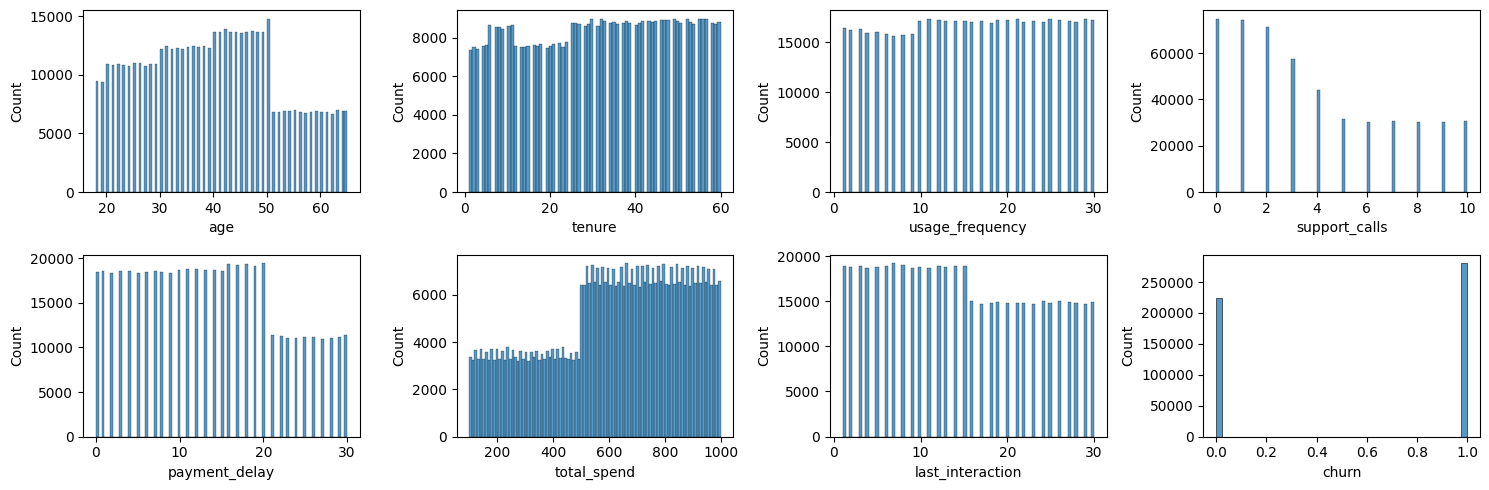

In [276]:
#check of  contiuous distribution 
fig,ax=plt.subplots(2,4,figsize=(15,5))
c=np.arange(8)
for index,column in zip(c,df.select_dtypes(include='number').columns) :

     sns.histplot(data=df,x=column,ax=ax[index//4,index%4])
plt.tight_layout()


<Axes: >

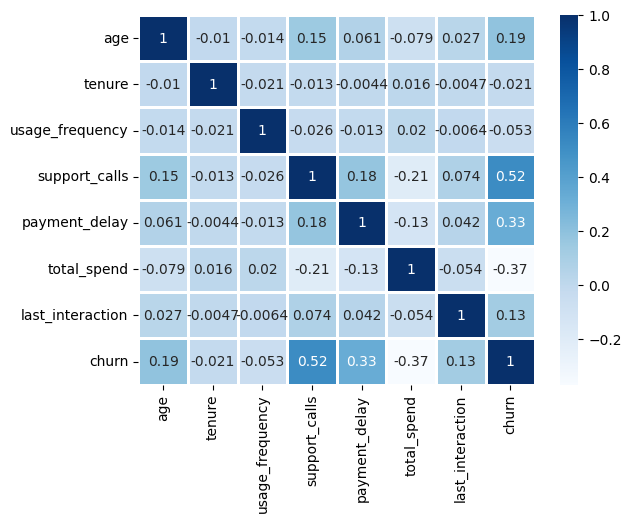

In [277]:
#check correlation between columns :
corr=df.select_dtypes(include='number').corr()
sns.heatmap(corr,annot=True,cmap="Blues",linewidths=1)

<Axes: xlabel='contract_length', ylabel='count'>

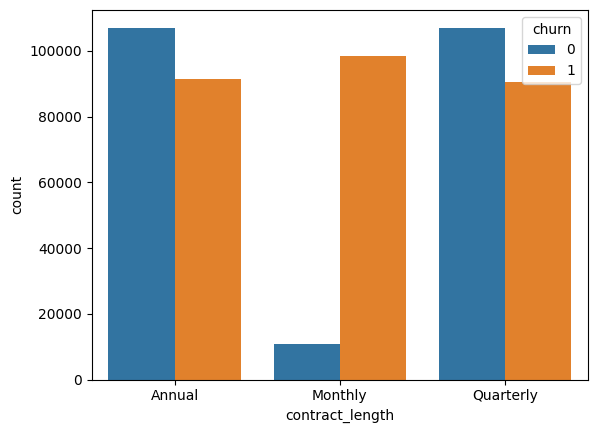

In [278]:
sns.countplot(data=df,x='contract_length',hue='churn')

* **From this graph, I concluded that the customers who churned  the most are those with a monthly contract**

In [279]:
df_filtered=df[df['churn']==1]
pie_df=df_filtered.groupby(df_filtered['subscription_type'])['churn'].sum()
pie_df=pie_df.to_frame()

In [280]:
pie_df.reset_index(inplace=True)

In [281]:
pie_df

,subscription_type,churn
0,Basic,93566
1,Premium,93133
2,Standard,93793


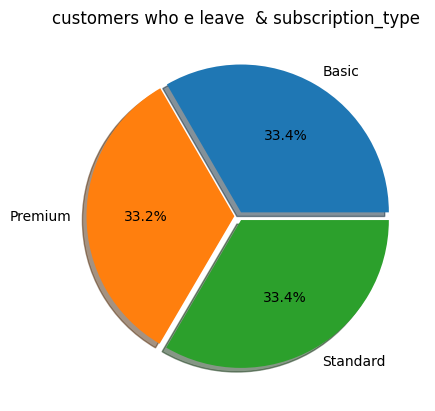

In [282]:
plt.pie(pie_df['churn'],labels=pie_df['subscription_type'].unique(),shadow=True,explode=[0.03,0.03,0.03],autopct='%1.1F%%')
plt.title("customers who e leave  & subscription_type ")
plt.show()

* **Through this graph, I concluded that the customers who are churned  are not  completely based on subscription type**

### check relationship between gender and churn customers 

<Axes: xlabel='gender', ylabel='count'>

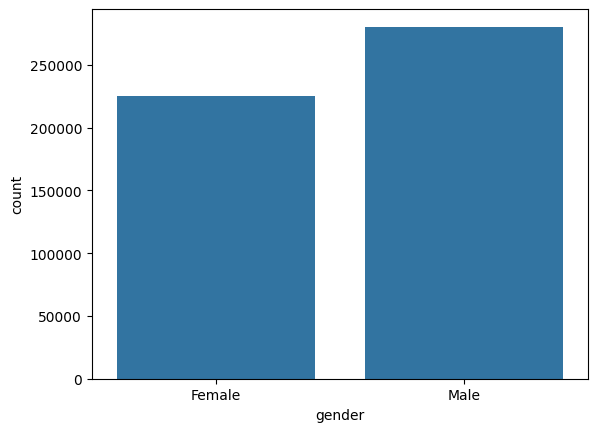

In [283]:
sns.countplot(data=df,x="gender")

<Axes: xlabel='gender', ylabel='count'>

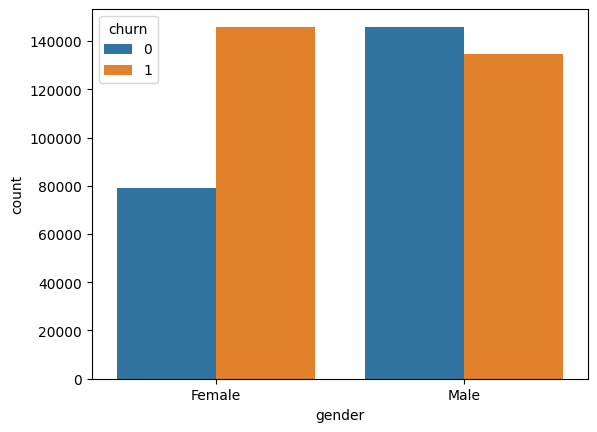

In [284]:
sns.countplot(data=df,x="gender",hue="churn")

* **i conclude from two graphs that Female are the most churn*** 

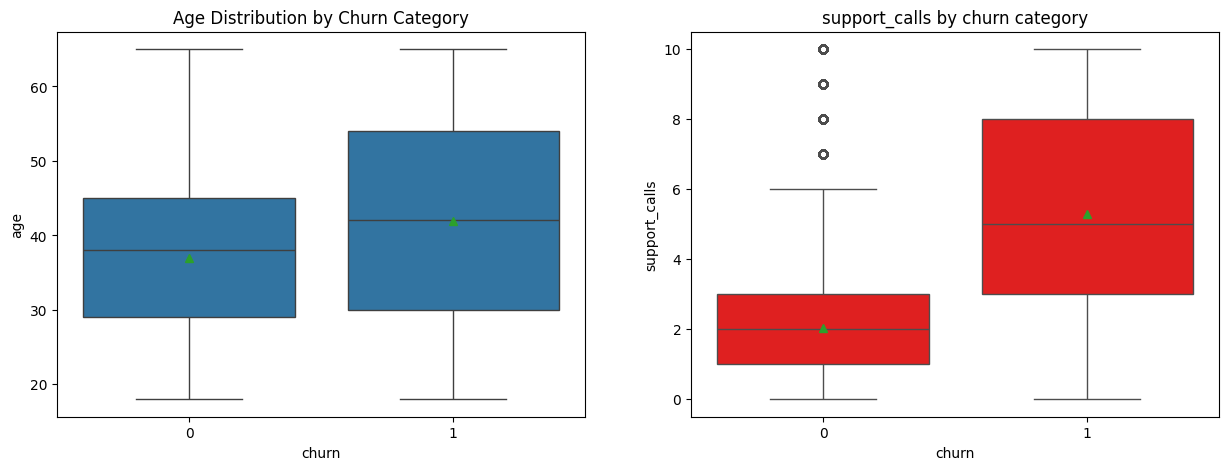

In [285]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'churn',y = 'age',showmeans=True,data=df,ax=ax[0]).set_title("Age Distribution by Churn Category")
sns.boxplot(x = 'churn',y = 'support_calls',showmeans=True,color='r',data=df,ax=ax[1]).set_title("support_calls by churn category")
plt.show()

* **i conclude from graoh one  that 75% of customers who are churn it is age abave 50**
* **i conclude from graoh two  that customers who are churn  using suuport calls more than 5 times**   

<Axes: xlabel='support_calls', ylabel='count'>

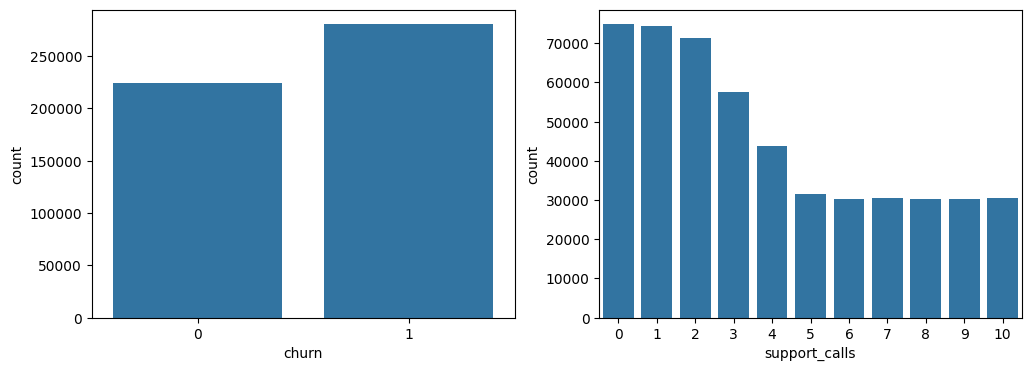

In [286]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="churn", data=df, ax=axes[0])
sns.countplot(data=df,x='support_calls',ax=axes[1])

<Axes: xlabel='support_calls', ylabel='count'>

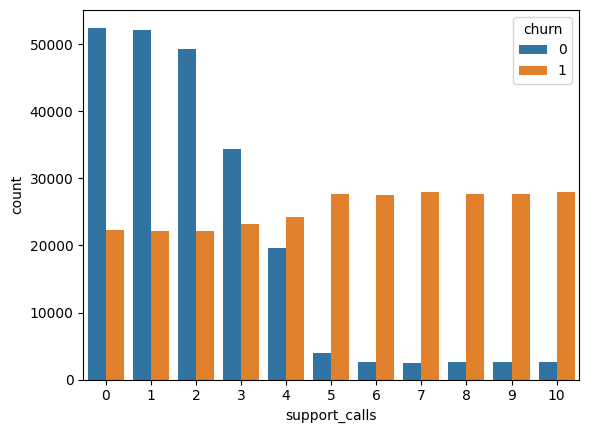

In [287]:
sns.countplot(data=df,x='support_calls',hue='churn')

* **It ended up being that people using support_calls 4 times more are the people exposed to churn**

In [288]:
# relation ship between usage_frequency and support_call 
df_freq_support=df.groupby('support_calls')['usage_frequency'].sum()

df_freq_support=df_freq_support.to_frame()
df_freq_support.reset_index(inplace=True)
df_freq_support


,support_calls,usage_frequency
0,0,1190977
1,1,1190056
2,2,1135961
3,3,910303
4,4,686570
5,5,488770
6,6,467001
7,7,469206
8,8,464159
9,9,465440


<Axes: xlabel='support_calls', ylabel='usage_frequency'>

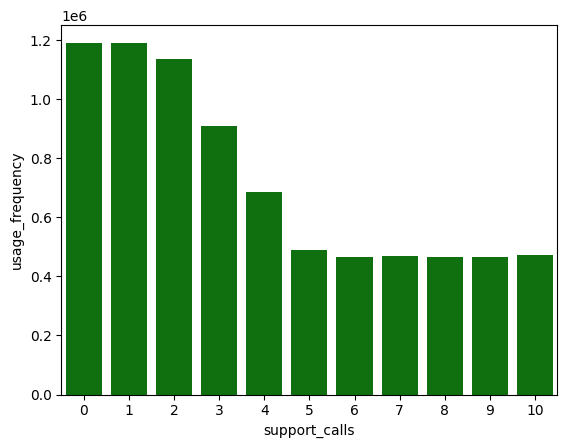

In [289]:
sns.barplot(data=df_freq_support,x='support_calls',y='usage_frequency',color='green')

In [290]:
df['payment_delay'].nunique()

31

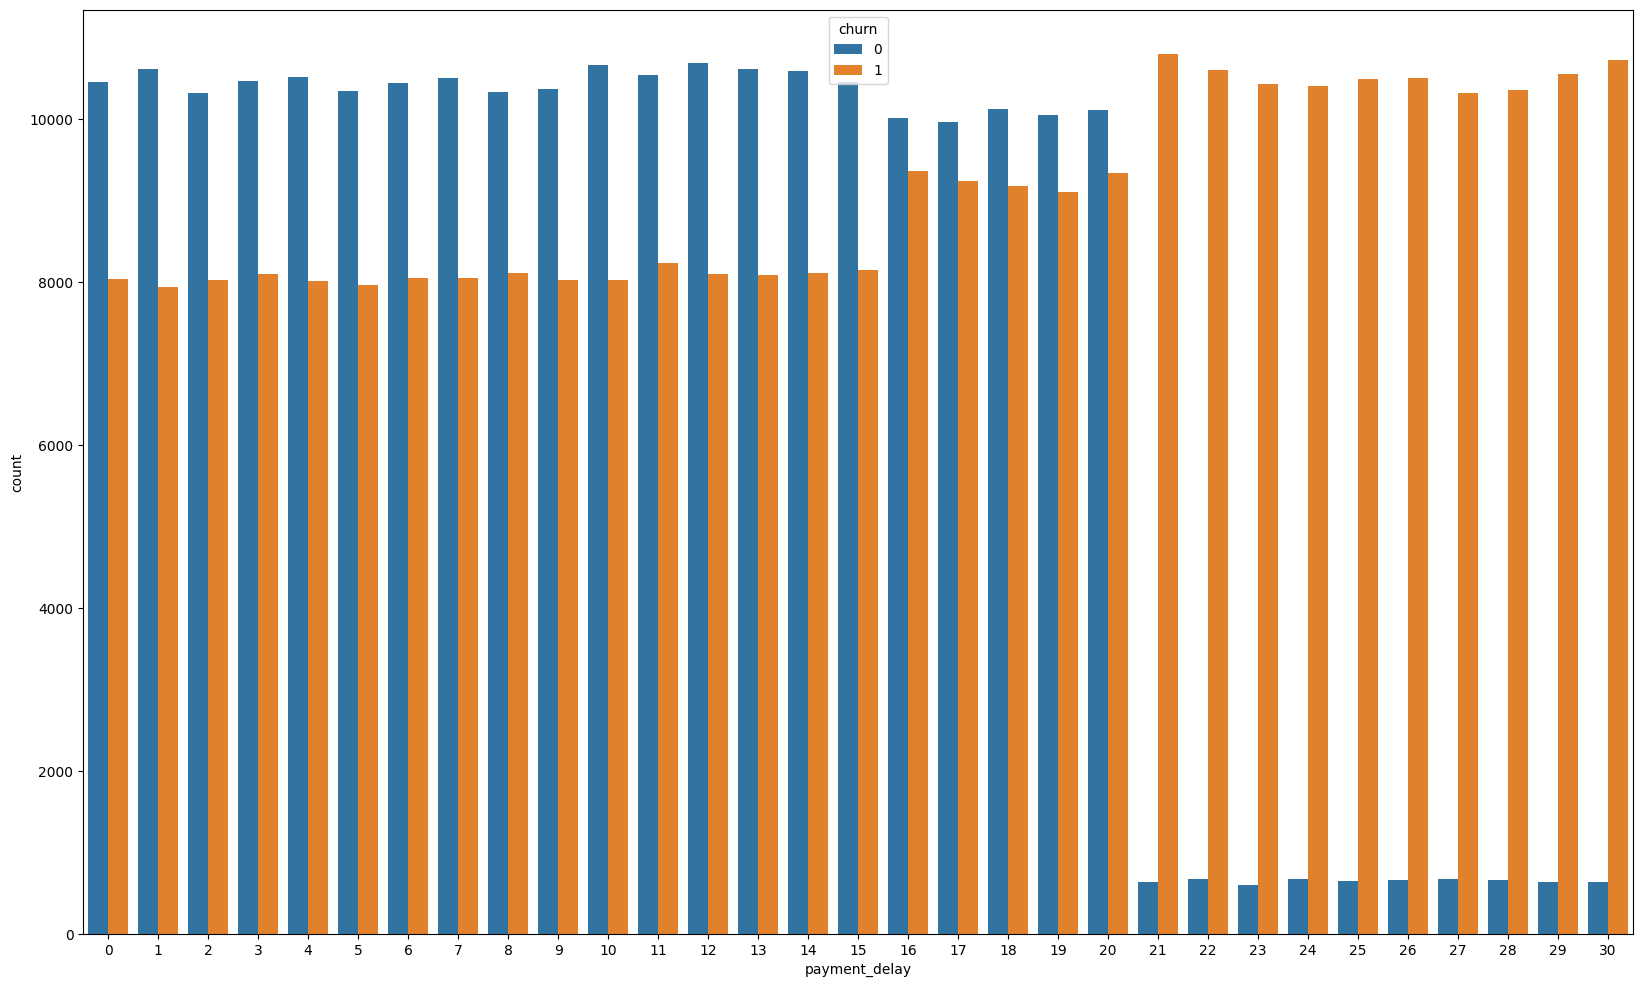

In [291]:
fig, ax = plt.subplots()
sns.countplot(x='payment_delay',data=df,hue='churn',)
fig.set_size_inches((20, 12))

* **conclude that if payment_delay late  more than 21 month the customer will churn** 

In [292]:
print(df['tenure'].unique())
print('number of unique values in "tenure" column ',df['tenure'].nunique())


[39 49 14 38 32 33 37 12  3 18 21 41 35  4 56 44 15 55 43 52 26  2 29 59
 40 51 53 24 30  6 28 17 60  7 34 10  5 45 54 58 25 13 47 31 22 19 23  1
  8 46 16 50 48 11 42 27  9 20 57 36]
number of unique values in "tenure" column  60


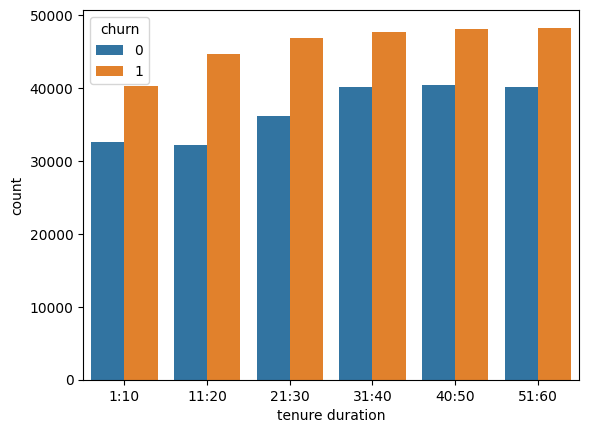

In [293]:
df["new_column"] = pd.cut(df["tenure"], bins=[1, 10, 20, 30, 40, 50, 60], labels=['1:10', '11:20', '21:30', '31:40','40:50', '51:60'])
sns.countplot(x="new_column", hue="churn", data=df)
plt.xlabel("tenure duration")
plt.show()

In [294]:
df.drop('new_column',inplace=True,axis=1)

### check for outliers :

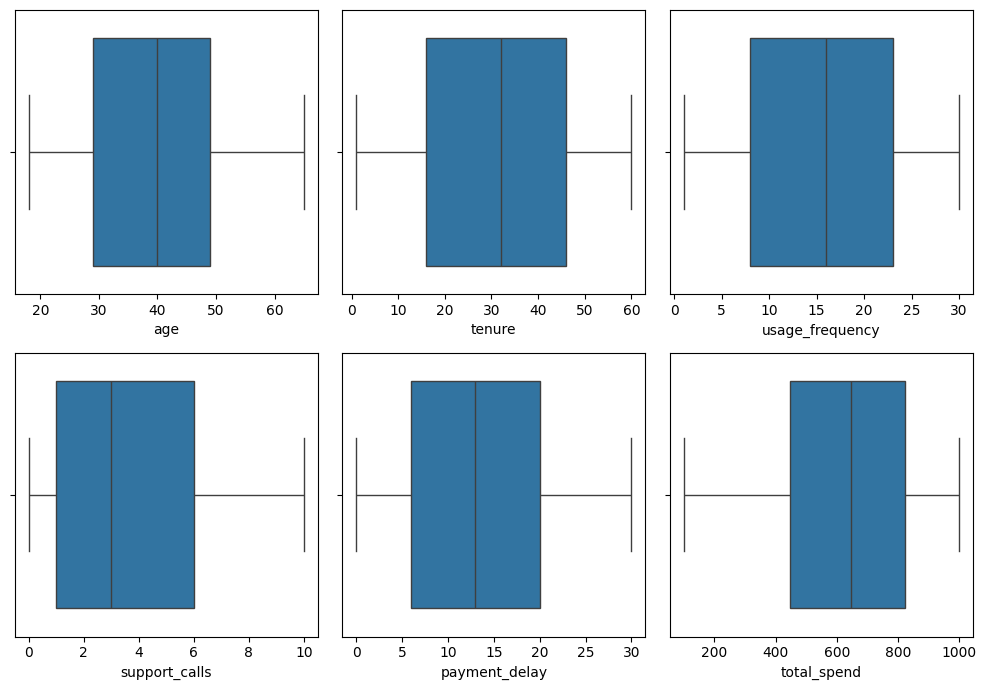

In [295]:

c=['age','tenure','usage_frequency','support_calls','payment_delay','total_spend']
fig,axis=plt.subplots(2,3,figsize=(10,7))
for i,j in enumerate(c) :
    sns.boxplot(data=df,x=j,ax=axis[i//3,i%3])
plt.tight_layout()    
 
    

<Axes: xlabel='last_interaction'>

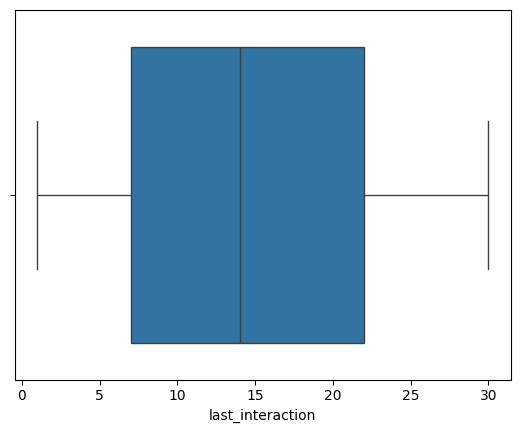

In [296]:
sns.boxplot(data=df,x='last_interaction')   

<Axes: xlabel='total_spend', ylabel='Count'>

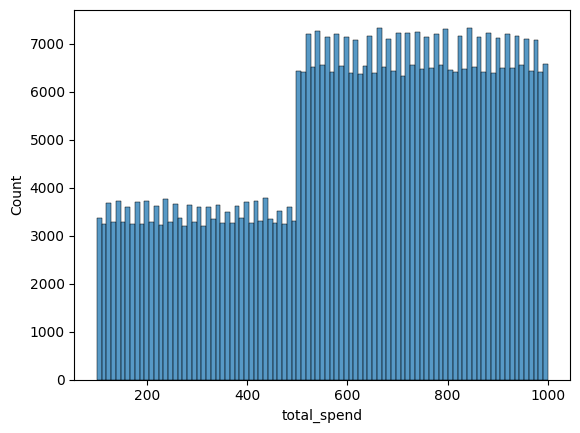

In [297]:
sns.histplot(x='total_spend',data=df)

* **There are no outliers**


# preprocessing 

In [298]:
#transform gender column 
df_new=df.copy() 
df_new.replace({'Female':1,'Male':0},inplace=True)

In [299]:
df_new=pd.get_dummies(df_new,columns=['subscription_type','contract_length'],dtype='int64')

In [300]:
df_new.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,30,1,39,14,5,18,932,17,1,0,0,1,1,0,0
1,65,1,49,1,10,8,557,6,1,1,0,0,0,1,0
2,55,1,14,4,6,18,185,3,1,1,0,0,0,0,1
3,58,0,38,21,7,7,396,29,1,0,0,1,0,1,0
4,23,0,32,20,5,8,617,20,1,1,0,0,0,1,0


In [301]:
df_new.shape

(505206, 15)

# Feature selection using  Backward Feature Elimination 

In [302]:
import statsmodels.api as sm

In [303]:
stmodel=sm.OLS(y,x).fit()

In [304]:
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 3.558e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:50:37   Log-Likelihood:            -2.0884e+05
No. Observations:              505206   AIC:                         4.177e+05
Df Residuals:                  505193   BIC:                         4.178e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.0034   4.12e-05     81.409      0.000       0.003       0.003
gender                         0.1017      0.001     96.687      0.000       0.100       0.104
tenure                        -0.0002   2.99e-05     -7.017      0.000      -0.000      -0.000
usage_frequency               -0.0018   5.98e-05    -29.953      0.000      -0.002      -0.002
support_calls                  0.0578      0.000    331.810      0.000       0.057       0.058
payment_delay                  0.0115   6.24e-05    184.683      0.000       0.011       0.012
total_spend                   -0.0004   2.17e-06   -203.881      0.000      -0.000      -0.000
last_interaction               0.0045   6.06e-05     73.963      0.000       0.004       0.005
subscription_type_Basic        0.1439      0.002     85.806      0.000       0.141       0.147
subscription_type_Premium      0.1331      0.002     80.128      0.000       0.130       0.136
subscription_type_Standard     0.1340      0.002     80.510      0.000       0.131       0.137
contract_length_Annual         0.0512      0.002     31.483      0.000       0.048       0.054
contract_length_Monthly        0.3109      0.002    172.493      0.000       0.307       0.314
contract_length_Quarterly      0.0489      0.002     30.046      0.000       0.046       0.052
==============================================================================
Omnibus:                      812.636   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.776
Skew:                          -0.039   Prob(JB):                    2.48e-153
Kurtosis:                       2.835   Cond. No.                     2.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* **no columns its p value lower than 0.05  so i will not delete any column** 

In [305]:
from sklearn.model_selection import train_test_split
x=df_new.drop('churn',axis=1)
y=df_new['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [306]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (404164, 14)
shape of x_test (101042, 14)
shape of y_train (404164,)
shape of y_test (101042,)


In [307]:
x_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
82994,64,1,7,21,9,22,460,24,0,1,0,1,0,0
139215,18,1,22,20,3,30,957,18,1,0,0,0,0,1
200786,19,0,10,2,0,20,885,10,1,0,0,0,1,0
453373,48,1,28,28,2,6,453,22,0,1,0,0,1,0
428718,39,0,41,12,2,1,789,16,1,0,0,0,0,1


In [308]:
scaler2=MinMaxScaler() # I used  MinMaxScaler after split to avoid Leakage of target data 

In [309]:
x_train['total_spend']=scaler2.fit_transform(x_train['total_spend'].values.reshape(-1,1))

In [310]:
x_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
82994,64,1,7,21,9,22,0.400000,24,0,1,0,1,0,0
139215,18,1,22,20,3,30,0.952222,18,1,0,0,0,0,1
200786,19,0,10,2,0,20,0.872222,10,1,0,0,0,1,0
453373,48,1,28,28,2,6,0.392222,22,0,1,0,0,1,0
428718,39,0,41,12,2,1,0.765556,16,1,0,0,0,0,1


<Axes: xlabel='total_spend', ylabel='Density'>

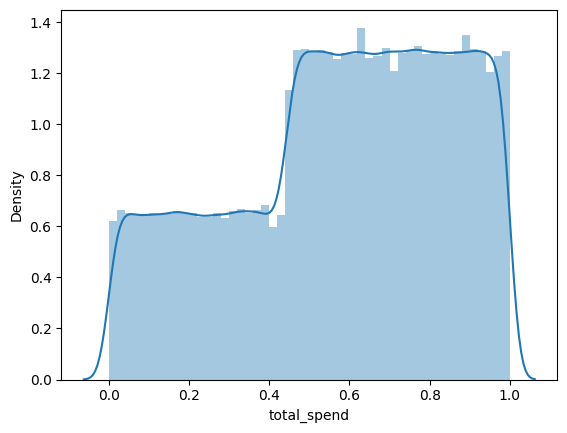

In [311]:
sns.distplot(x_train['total_spend'])

In [312]:
x_test.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
396177,42,0,45,5,2,9,925,14,1,0,0,1,0,0
243317,31,1,24,25,6,1,209,19,1,0,0,0,1,0
213775,41,1,48,23,3,6,671,17,0,0,1,1,0,0
378429,34,1,55,3,2,15,655,4,1,0,0,0,0,1
270314,48,0,51,13,0,2,617,7,1,0,0,0,0,1


In [313]:
x_test['total_spend']=scaler2.fit_transform(x_test['total_spend'].values.reshape(-1,1))

In [314]:
x_test.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
396177,42,0,45,5,2,9,0.916667,14,1,0,0,1,0,0
243317,31,1,24,25,6,1,0.121111,19,1,0,0,0,1,0
213775,41,1,48,23,3,6,0.634444,17,0,0,1,1,0,0
378429,34,1,55,3,2,15,0.616667,4,1,0,0,0,0,1
270314,48,0,51,13,0,2,0.574444,7,1,0,0,0,0,1


In [315]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)

shape of x_train (404164, 14)
shape of x_test (101042, 14)


In [316]:
x_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
82994,64,1,7,21,9,22,0.400000,24,0,1,0,1,0,0
139215,18,1,22,20,3,30,0.952222,18,1,0,0,0,0,1
200786,19,0,10,2,0,20,0.872222,10,1,0,0,0,1,0
453373,48,1,28,28,2,6,0.392222,22,0,1,0,0,1,0
428718,39,0,41,12,2,1,0.765556,16,1,0,0,0,0,1


In [317]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404164 entries, 82994 to 473296
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   age                         404164 non-null  int64  
 1   gender                      404164 non-null  int64  
 2   tenure                      404164 non-null  int64  
 3   usage_frequency             404164 non-null  int64  
 4   support_calls               404164 non-null  int64  
 5   payment_delay               404164 non-null  int64  
 6   total_spend                 404164 non-null  float64
 7   last_interaction            404164 non-null  int64  
 8   subscription_type_Basic     404164 non-null  int64  
 9   subscription_type_Premium   404164 non-null  int64  
 10  subscription_type_Standard  404164 non-null  int64  
 11  contract_length_Annual      404164 non-null  int64  
 12  contract_length_Monthly     404164 non-null  int64  
 13  contract_length

In [318]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


**check model before SMOTE**

In [320]:
model1.fit(x_train,y_train)

LogisticRegression()

In [321]:
y1_pred=model1.predict(x_test)

In [322]:
print("accuracy",accuracy_score(y_test,y1_pred))

accuracy 0.8483600878842461


In [323]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     44943
           1       0.87      0.85      0.86     56099

    accuracy                           0.85    101042
   macro avg       0.85      0.85      0.85    101042
weighted avg       0.85      0.85      0.85    101042



In [324]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [325]:
from imblearn.over_sampling import SMOTE

In [326]:
smote=SMOTE()

In [327]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [328]:
from collections import Counter

In [329]:
print("Before SMOTE:",Counter(y_train))

Before SMOTE: Counter({1: 224393, 0: 179771})


In [330]:
print("After SMOTE:",Counter(y_train_smote))

After SMOTE: Counter({1: 224393, 0: 224393})


In [381]:
y_train_smote.value_counts()

churn
1    224393
0    224393
Name: count, dtype: int64

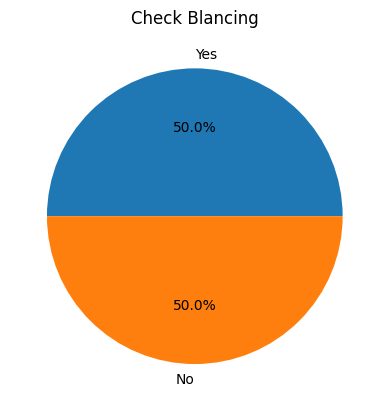

In [385]:
plt.pie(y_train_smote.value_counts(),autopct='%1.1F%%',labels=['Yes','No'])
plt.title('Check Blancing')
plt.show()

# Model Evalution 

In [380]:
models={'AdaBoost':AdaBoostClassifier(),'SVM':SVC(kernel="rbf", degree=3, coef0=1, C=5),'RandomForest':RandomForestClassifier(n_estimators=100,verbose=1), 'XGBoost': XGBClassifier()}

In [391]:
results=pd.DataFrame(columns=['Model','Recall','Precision','F1-score','Accuracy'])

0


In [404]:

def model(x_train,y_train,x_test,y_test):
    for model_name in models:
        
        model=models[model_name].fit(x_train,y_train)
     

        recall=round(metrics.recall_score(y_test,model.predict(x_test))*100,2) # TP/(TP+FN)
        precision=round(metrics.precision_score(y_test,model.predict(x_test))*100,2) #TP/(TP+FP)
        f1=round(metrics.f1_score(y_test,model.predict(x_test))*100,2)
        accuracy=accuracy_score(y_test,model.predict(x_test))
        results.loc[len(results.index)]=[model_name,recall,precision,f1,accuracy]

## model

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   20.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s


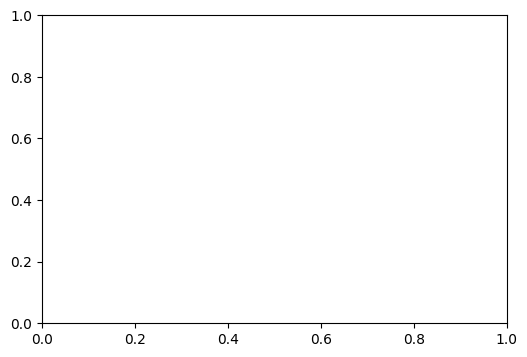

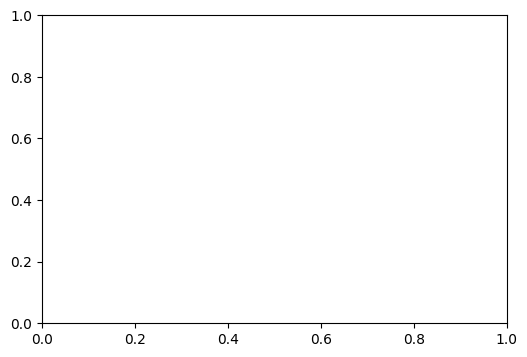

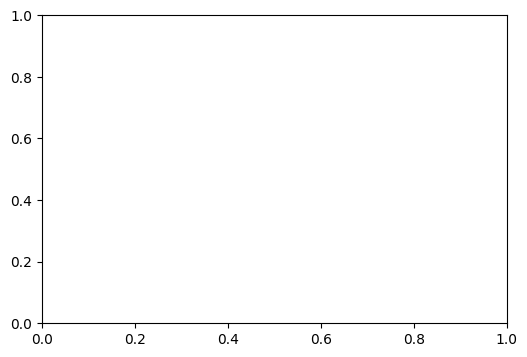

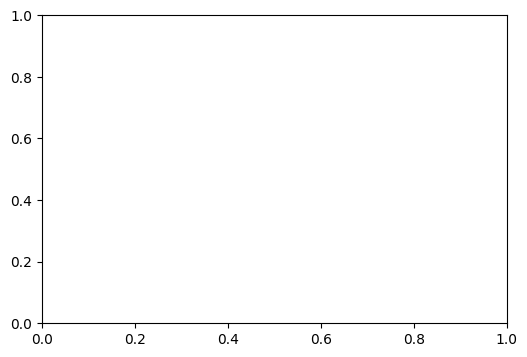

In [405]:

model(x_train_smote,y_train_smote,x_test,y_test)

# Disply the difference between models 

In [407]:
results.sort_values("Accuracy",ascending=False)

,Model,Recall,Precision,F1-score,Accuracy
2,RandomForest,99.64,89.73,94.43,0.934720
3,XGBoost,99.44,89.74,94.35,0.933820
1,SVM,89.53,89.95,89.74,0.886334
0,AdaBoost,82.84,90.53,86.51,0.856624
